In [60]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [62]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [63]:
df.shape

(30000, 25)

In [64]:
# Combine other small categories  
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0), 'EDUCATION'] = 4

In [65]:
# Combine to have 1:married, 2:single, 3:other
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [66]:
df.rename({'PAY_0': 'pay_stat_sep', 'PAY_2': 'pay_stat_aug', 'PAY_3': 'pay_stat_jul', 'PAY_4': 'pay_stat_jun', 'PAY_5': 
           'pay_stat_may', 'PAY_6': 'pay_stat_apr', 'default.payment.next.month': 'default'}, axis=1, inplace=True)

In [67]:
for col in df.columns:
    df.rename({'{}'.format(col): '{}'.format(col.lower())}, axis=1, inplace=True)

In [68]:
df['last_month_v_limit'] = df['bill_amt1']/df['limit_bal']

In [69]:
df['last_month_v_limit'].head() 

0    0.195650
1    0.022350
2    0.324878
3    0.939800
4    0.172340
Name: last_month_v_limit, dtype: float64

In [71]:
from scipy.stats.stats import pearsonr
pearsonr(df['default'], df['last_month_v_limit'])

(0.08616810335391435, 1.5126308865122633e-50)

In [72]:
df['no_credit_used'] = np.where(df['pay_stat_sep']==-2, 1, 0)

In [73]:
df['full_payment_made'] = np.where(df['pay_stat_sep']==-1, 1, 0)

In [74]:
df['min_payment_made'] = np.where(df['pay_stat_sep']==0, 1, 0)

In [75]:
months = ['sep', 'aug', 'jul', 'jun', 'may', 'apr']
for i, c in enumerate(months):
    df[f'deferred_payment_{c}'] = np.where(df[f'pay_stat_{c}']<=0, 0, 1)
    

In [76]:
df.head(25)

,id,limit_bal,sex,education,marriage,age,pay_stat_sep,pay_stat_aug,pay_stat_jul,pay_stat_jun,...,last_month_v_limit,no_credit_used,full_payment_made,min_payment_made,deferred_payment_sep,deferred_payment_aug,deferred_payment_jul,deferred_payment_jun,deferred_payment_may,deferred_payment_apr
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.195650,0,0,0,1,1,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.022350,0,1,0,0,1,0,0,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,0.324878,0,0,1,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,0.939800,0,0,1,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.172340,0,1,0,0,0,0,0,0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,1.288000,0,0,1,0,0,0,0,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,0.735930,0,0,1,0,0,0,0,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,0.118760,0,0,1,0,0,0,0,0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,0.080607,0,0,1,0,0,1,0,0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.000000,1,0,0,0,0,0,0,0,0


In [77]:
df.deferred_payment_sep.value_counts()

0    23182
1     6818
Name: deferred_payment_sep, dtype: int64

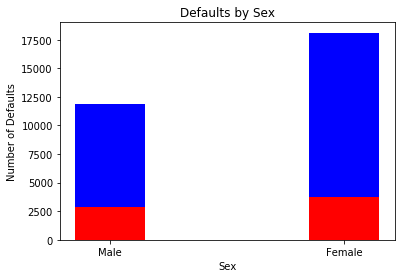

In [78]:
p1 = plt.bar(['Male', 'Female'],[df.default.loc[df['sex'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], color='r', width=0.3)
p2 = plt.bar(['Male', 'Female'],[df.default.loc[df['sex'] == 1].value_counts()[0], df.default.loc[df['sex'] == 2].value_counts()[0]], color='b', 
             bottom=[df.default.loc[df['sex'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], width=.3)
plt.title("Defaults by Sex")
plt.ylabel('Number of Defaults')
plt.xlabel('Sex')
plt.show()

In [ ]:
p1 = plt.bar(['Male', 'Female'],[df.default.loc[df['education'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], color='r', width=0.3)
p2 = plt.bar(['Male', 'Female'],[df.default.loc[df['edcuation'] == 1].value_counts()[0], df.default.loc[df['sex'] == 2].value_counts()[0]], color='b', 
             bottom=[df.default.loc[df['sex'] == 1].value_counts()[1], df.default.loc[df['sex'] == 2].value_counts()[1]], width=.3)